# Retail Purchase Analysis: Customer Segmentation

This analysis aims to group customers of a retail store based on their purchase history using the K-means clustering algorithm. The dataset used contains information about customers' annual income, spending score, and other demographic details.

## Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

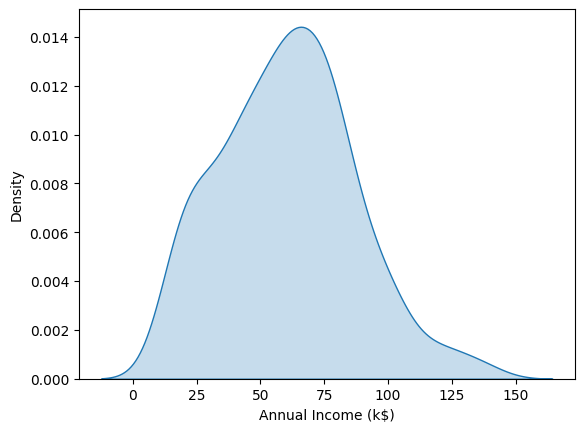

In [4]:
sns.kdeplot(df["Annual Income (k$)"], shade=True, palette='coolwarm')

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


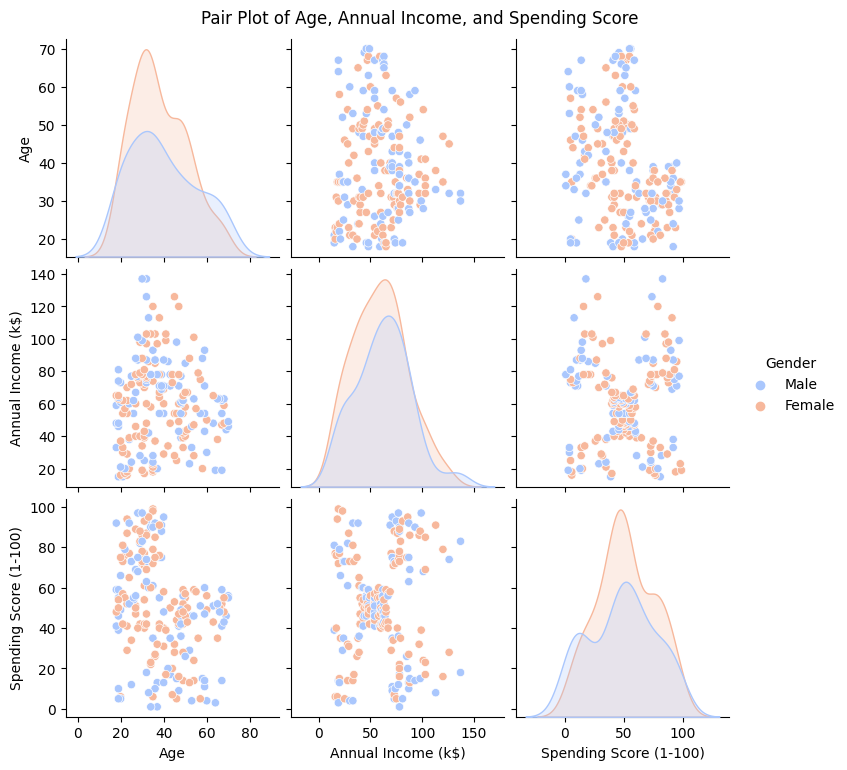

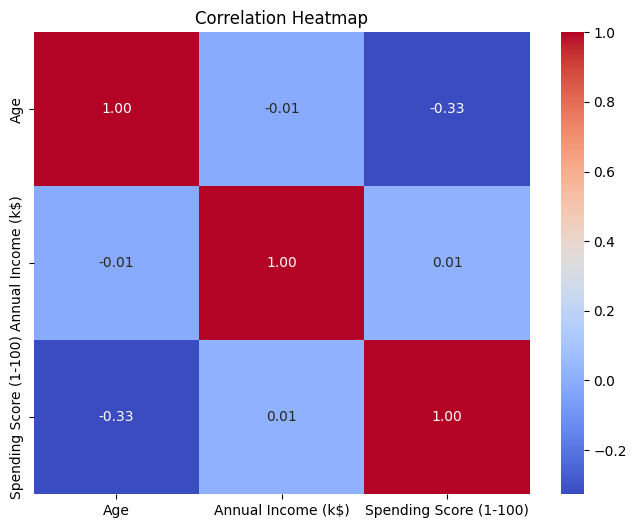

Pair plot and correlation heatmap created.


In [5]:
# Checking the column names to ensure they are correct
print(df.columns)

# Re-attempting the pair plot and correlation heatmap
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], hue='Gender', palette='coolwarm')
plt.suptitle('Pair Plot of Age, Annual Income, and Spending Score', y=1.02)
plt.show()

plt.figure(figsize=(8, 6))
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

print("Pair plot and correlation heatmap created.")

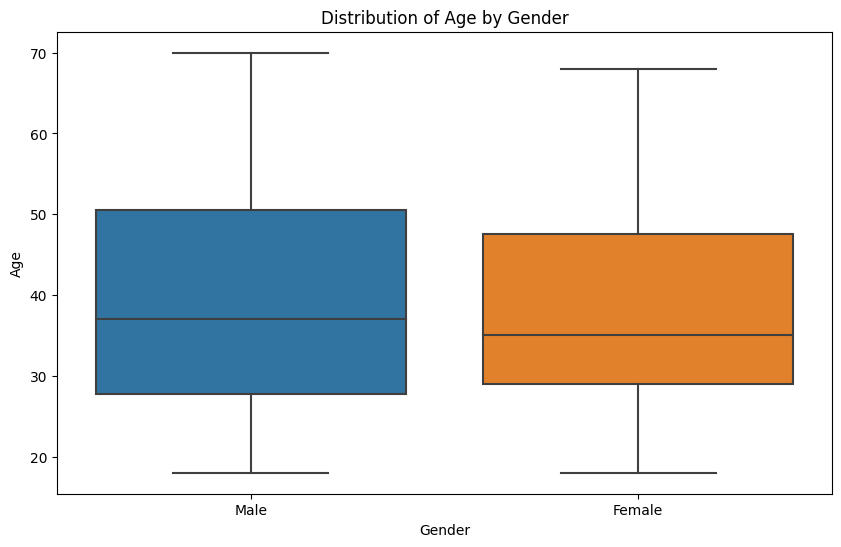

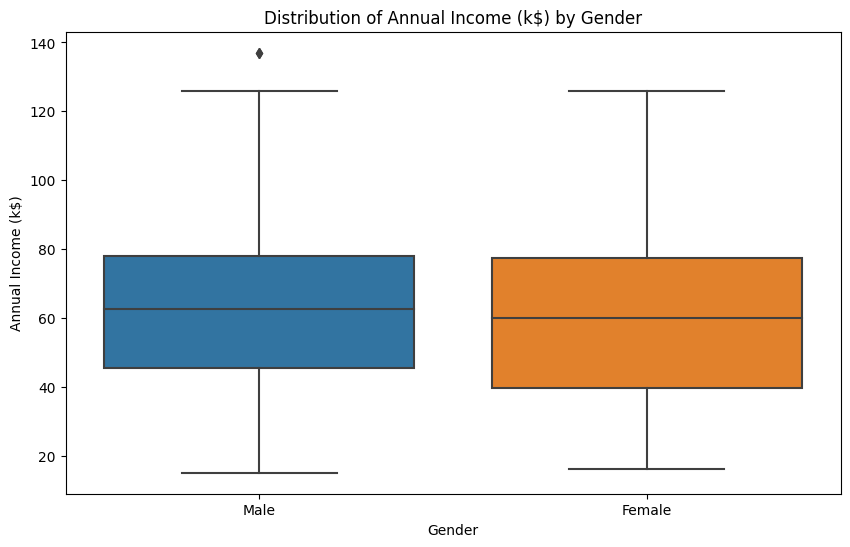

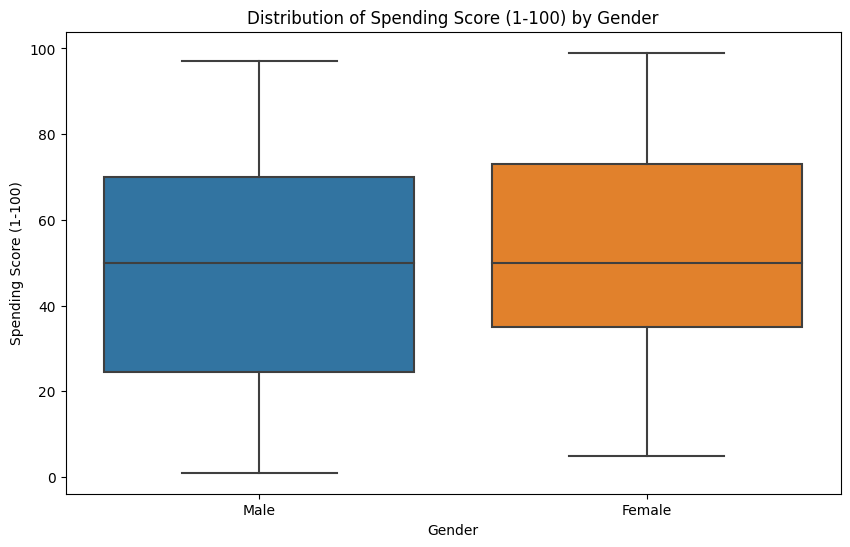

Box plots created for Age, Annual Income, and Spending Score by Gender.


In [6]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Gender', y=i)
    plt.title(f'Distribution of {i} by Gender')
    plt.show()

print("Box plots created for Age, Annual Income, and Spending Score by Gender.")

## Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

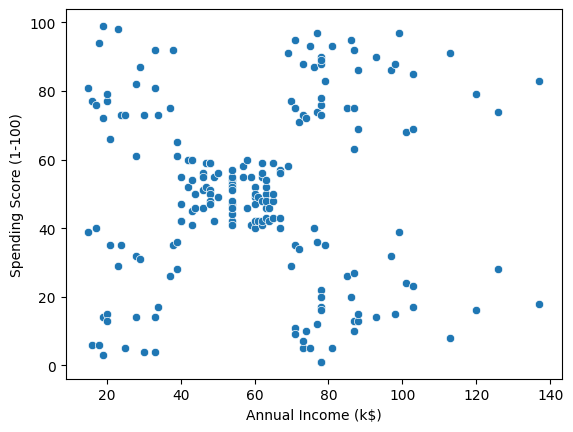

In [7]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)")

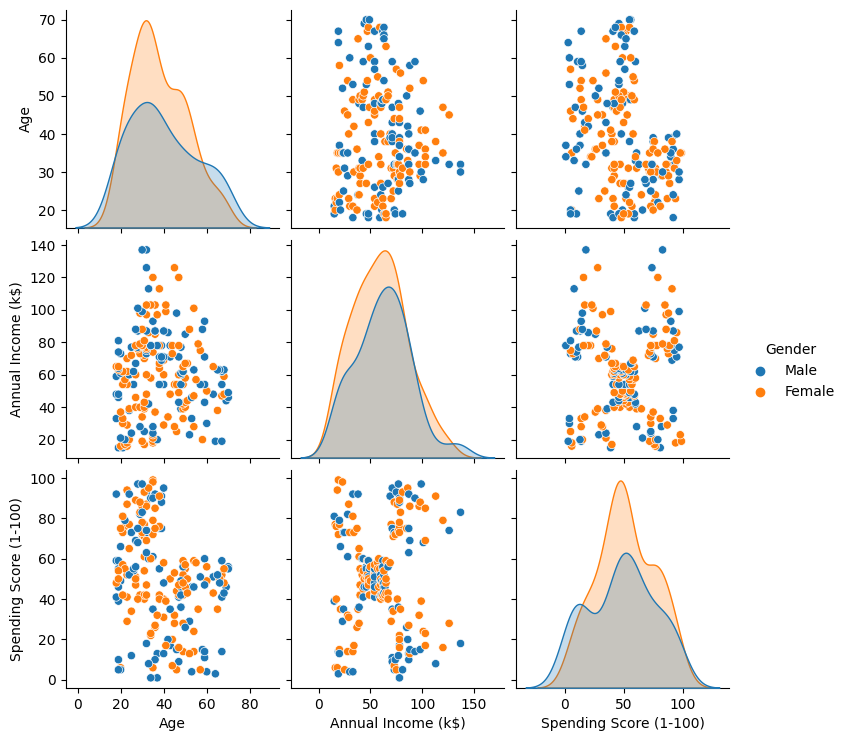

In [8]:
df.set_index('CustomerID', inplace=True)
sns.pairplot(df, hue="Gender")

In [9]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [10]:
df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.10,59.25,51.53
Male,39.81,62.23,48.51


## Modeling

## Univariate Clustering

In [11]:
clustering1 = KMeans(n_clusters=3)

In [12]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [13]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [14]:
df['Income_Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_Cluster
CustomerID,,,,,
1,Male,19,15,39,0
2,Male,21,15,81,0
3,Female,20,16,6,0
4,Female,23,16,77,0
5,Female,31,17,40,0


In [15]:
intertia_scores=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [16]:
intertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13278.112713472488,
 8481.496190476191,
 5081.484660267269,
 3931.988095238096,
 2827.308424908425,
 2269.3568376068374,
 1811.2139194139195]

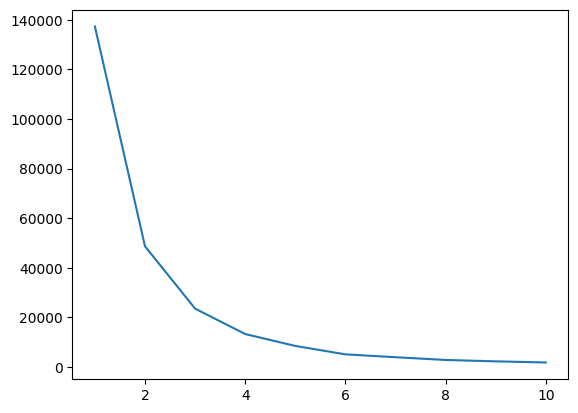

In [17]:
plt.plot(range(1,11), intertia_scores)

In [18]:
df.groupby('Income_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)

,Age,Annual Income (k$),Spending Score (1-100)
Income_Cluster,,,
0,39.50,33.49,50.23
1,37.83,99.89,50.64
2,38.72,67.09,50.00


## Bivariate Clustering

In [19]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster']= clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_Cluster,Spending and Income Cluster
CustomerID,,,,,,
1,Male,19,15,39,0,2
2,Male,21,15,81,0,3
3,Female,20,16,6,0,2
4,Female,23,16,77,0,3
5,Female,31,17,40,0,2


In [20]:
intertia_scores2=[]
for i in range (1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)

In [21]:
intertia_scores2

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37239.83554245604,
 30259.65720728547,
 25022.485004530354,
 21826.936303231654,
 20041.990848686197]

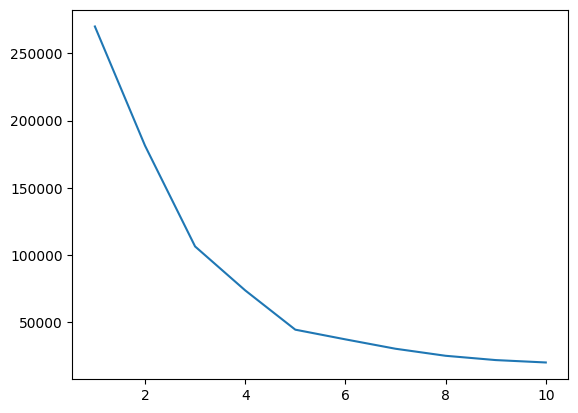

In [22]:
plt.plot(range(1,11), intertia_scores2)

In [23]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']

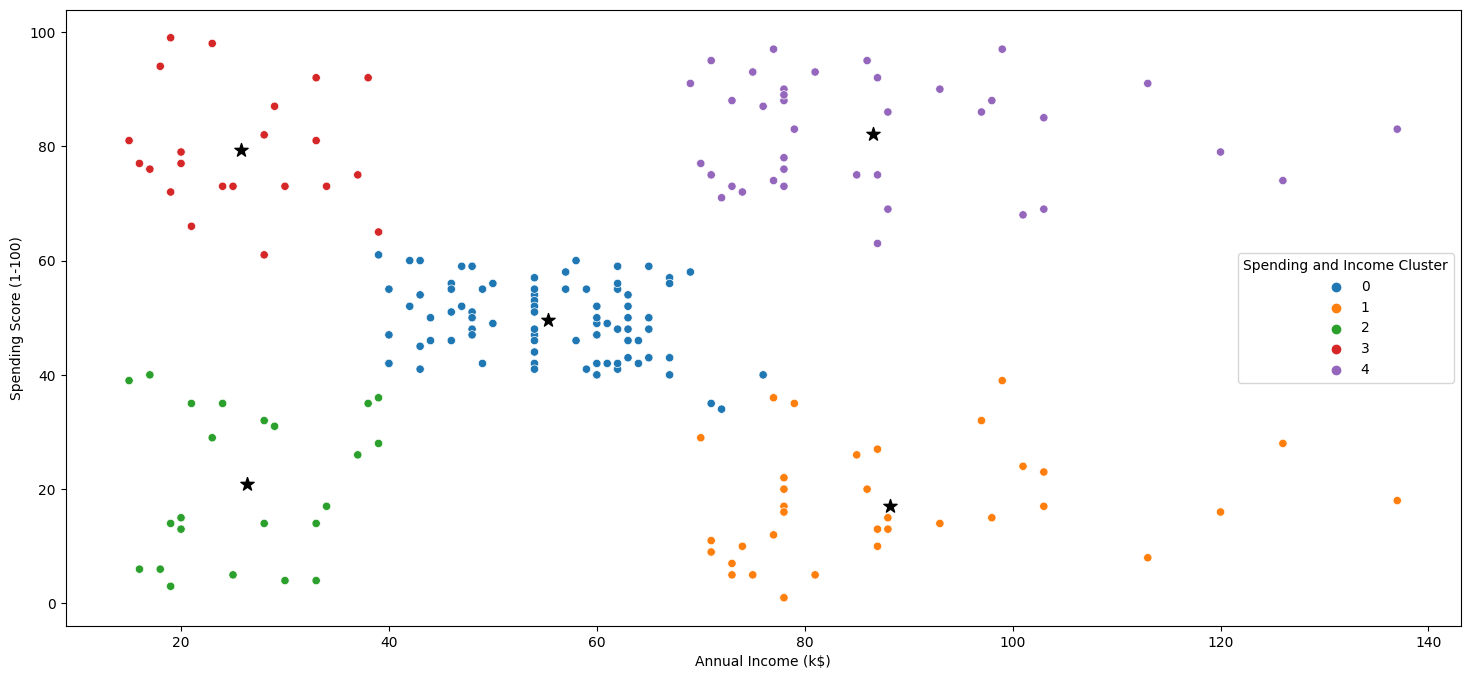

In [41]:
plt.figure(figsize=(18, 8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker="*")
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='tab10')
plt.savefig("Clustering_Bivarate.png")

In [25]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize='index').round(2)

Gender,Female,Male
Spending and Income Cluster,,
0,0.59,0.41
1,0.46,0.54
2,0.61,0.39
3,0.59,0.41
4,0.54,0.46


In [26]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.72,55.30,49.52
1,41.11,88.20,17.11
2,45.22,26.30,20.91
3,25.27,25.73,79.36
4,32.69,86.54,82.13


## Multivariate Clustering

In [27]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [28]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_Cluster,Spending and Income Cluster
CustomerID,,,,,,
1,Male,19,15,39,0,2
2,Male,21,15,81,0,3
3,Female,20,16,6,0,2
4,Female,23,16,77,0,3
5,Female,31,17,40,0,2


In [29]:
df_multivar = pd.get_dummies(df, drop_first=True)
df_multivar

,Age,Annual Income (k$),Spending Score (1-100),Income_Cluster,Spending and Income Cluster,Gender_Male
CustomerID,,,,,,
1,19,15,39,0,2,True
2,21,15,81,0,3,True
3,20,16,6,0,2,False
4,23,16,77,0,3,False
5,31,17,40,0,2,False
...,...,...,...,...,...,...
196,35,120,79,1,4,False
197,45,126,28,1,1,False
198,32,126,74,1,4,True


In [30]:
df_multivar = df_multivar[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
df_multivar

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,19,15,39,True
2,21,15,81,True
3,20,16,6,False
4,23,16,77,False
5,31,17,40,False
...,...,...,...,...
196,35,120,79,False
197,45,126,28,False
198,32,126,74,True


In [31]:
df_multivar = scale.fit_transform(df_multivar)

In [34]:
df_multivar = pd.DataFrame(scale.fit_transform(df_multivar))

In [35]:
df_multivar.columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']

In [36]:
df_multivar

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


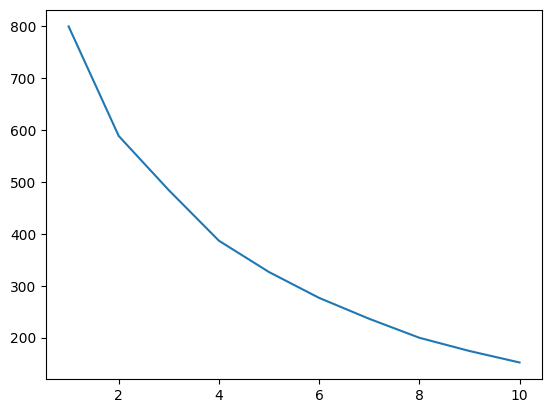

In [37]:
intertia_scores3=[]
for i in range (1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(df_multivar[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']])
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11), intertia_scores3)

In [39]:
df.to_csv('Clustering.csv')

## Conclusion
The K-means clustering algorithm successfully grouped customers into distinct clusters based on their annual income and spending score. The evaluation metrics provided insights into the quality of the clustering. This analysis can be used to better understand customer segments and tailor marketing strategies accordingly.

